## Initial Exploratory Data Analysis

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
wine = pd.read_csv("wine_quality_1000.csv")
wine.drop(wine.columns[0], axis=1, inplace=True)  # As column not going to be used

### Data Analysis

In [3]:
# Show 5 lines of data
print(wine.head(5))

  country                                        description  points  price  \
0      US  Very good Dry Creek Zin, robust and dry and sp...      89   25.0   
1  France  A very herbaceous character makes this wine se...      84   20.0   
2      US  A little simple and easy, but there's a wealth...      84   19.0   
3      US  From a dry-farmed vineyard and treated to wild...      88   38.0   
4      US  From a site near Annapolis, this wine shows a ...      91   62.0   

                      variety  
0                   Zinfandel  
1  Bordeaux-style White Blend  
2                        Rosé  
3                Petite Sirah  
4                  Pinot Noir  


In [4]:
# Get a mathematical analysis of the numerical columns
print(wine.describe())

            points        price
count  1000.000000  1000.000000
mean     87.806000    33.364000
std       3.369825    28.634235
min      80.000000     6.000000
25%      85.000000    18.000000
50%      88.000000    25.000000
75%      90.000000    40.000000
max      98.000000   463.000000


Small std dev in points, large in price

Price has much larger range that points
- Points got a range of 98-80=18
- Price got a range of 463-6=457

Price's mean is very low compared to its entire range

In [5]:
# Check if there are missing attributes in any of the columns
print("Missing Values:\n", wine.isnull().sum())

Missing Values:
 country        0
description    0
points         0
price          0
variety        0
dtype: int64


In [6]:
def hist_plot(data, type, bins=20, size=(9, 3)):
    plt.figure(figsize=size)
    plt.hist(data, bins=bins, edgecolor='black')

    plt.title(f'Distribution of {type}')
    plt.xlabel(type)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

    plt.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.3)
    plt.minorticks_on()
    plt.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

    plt.show()


def box_whisker_plot(data, type, number=5):
    top_varieties_list = data['variety'].value_counts().head(number).index
    filtered_data = data[data['variety'].isin(top_varieties_list)]

    filtered_data.boxplot(column=type,
                          by='variety',
                          grid=True,
                          patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='blue'),
                          whiskerprops=dict(color='green'),
                          flierprops=dict(markerfacecolor='yellow', marker='o', markersize=10)\
    )

    plt.suptitle(f"Box plot of Top {number} Wine Varieties by {type.capitalize()}")
    plt.title('')
    plt.xlabel("Variety")
    plt.ylabel(type.capitalize())

    plt.xticks(rotation=90)

    plt.show()

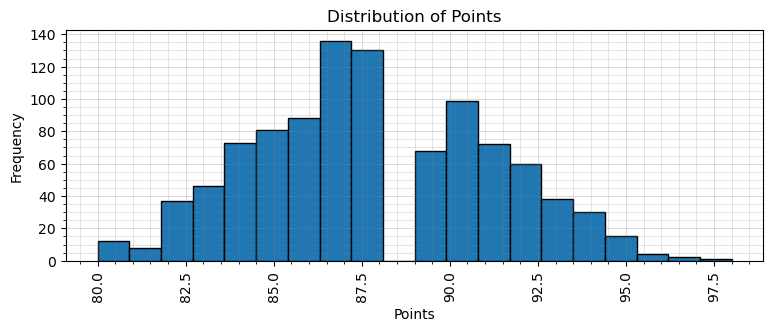

In [7]:
# Distribution of points in the wine database
data = wine['points']

hist_plot(data, 'Points')

Points have nearly a normal distribution centred around 88

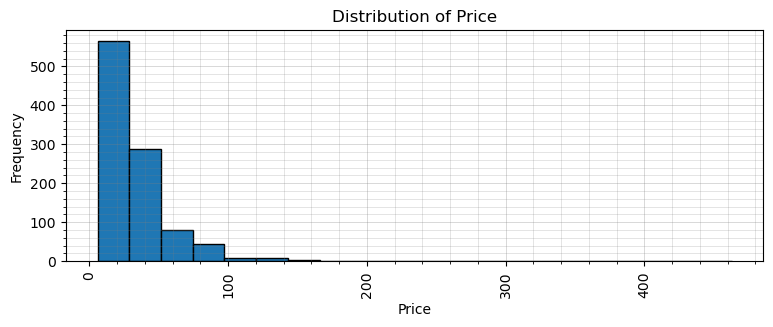

In [8]:
# Distribution of prices in the wine database
data = wine['price']

hist_plot(data, 'Price', 20)

Most wines are under 20, and nearly all are under 40, with a very steep roll-off.

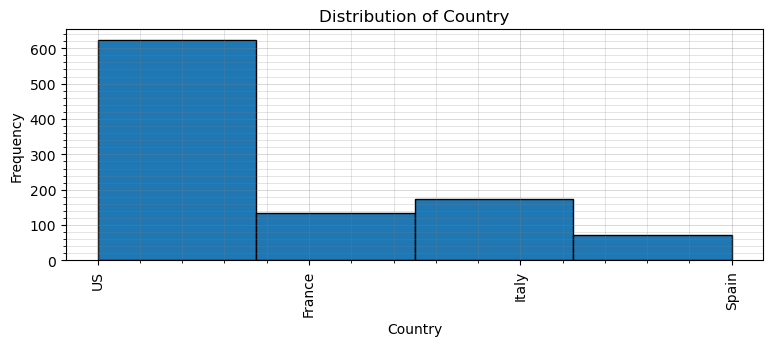

In [9]:
# Distribution of countries in the wine database
data = wine['country'].dropna()
num_options = wine['country'].nunique(dropna=True)

hist_plot(data, 'Country', num_options)

Over half of the wines in the database come from the US, with a pretty even split among the other three countries.

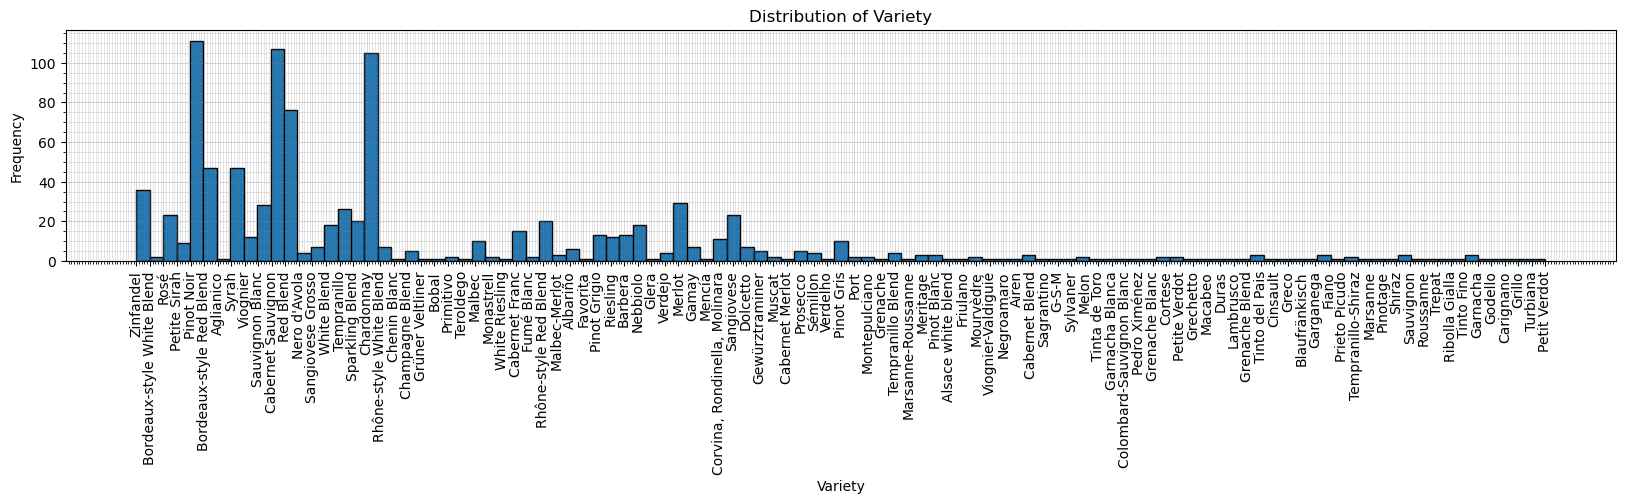

Number of varieties: 105


In [10]:
# Distribution of varieties in the wine database
data = wine['variety'].dropna()
num_options = wine['variety'].nunique(dropna=False)
size = (20, 3)

hist_plot(data, 'Variety', num_options, size=size)
print(f'Number of varieties: {num_options}')

Twelve varieties have over 20 instances within the database out of 105 varieties (around a quarter of the database). All the other varieties have few repetitions in the database. This assumes that the same varieties were written down identically, which is unlikely.

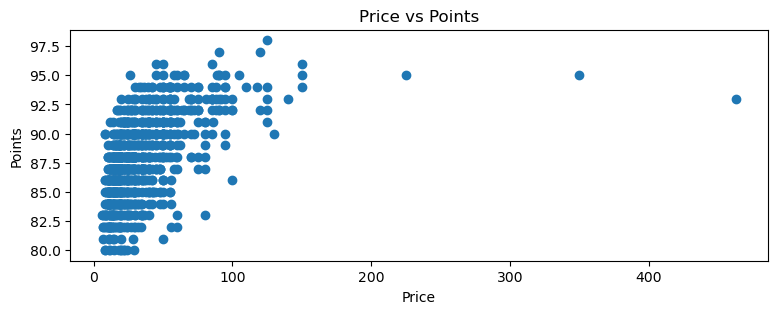

In [11]:
# Check to see if there is a correlation between price and points
plt.figure(figsize=(9, 3))
plt.scatter(wine['price'], wine['points'])

plt.title("Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")
plt.show()

It looks like there is only a slight trend upward in price with higher points. However, this is minimal, and prices are evenly distributed along the points range with a couple of outliers.

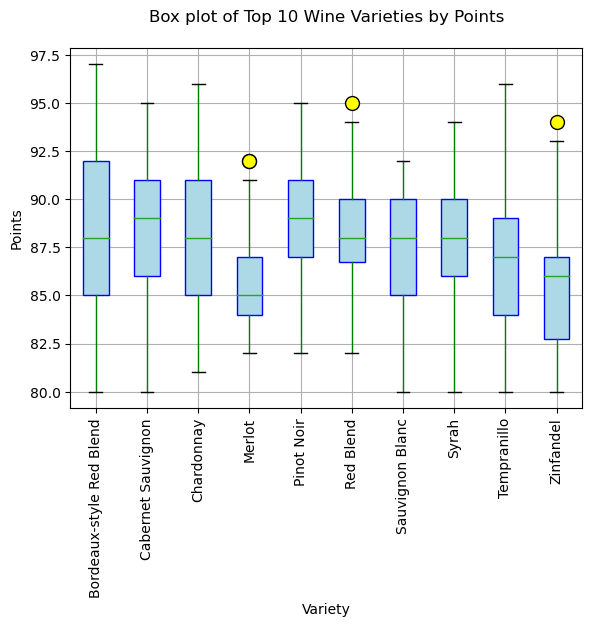

In [12]:
# Box and whisker plot of top wine varieties by points
box_whisker_plot(wine, 'points', 10)

Of the top 5 varieties all have similar boxes, barring 'Merlot', and Zinfandel. Minimal outliers (yellow dots).

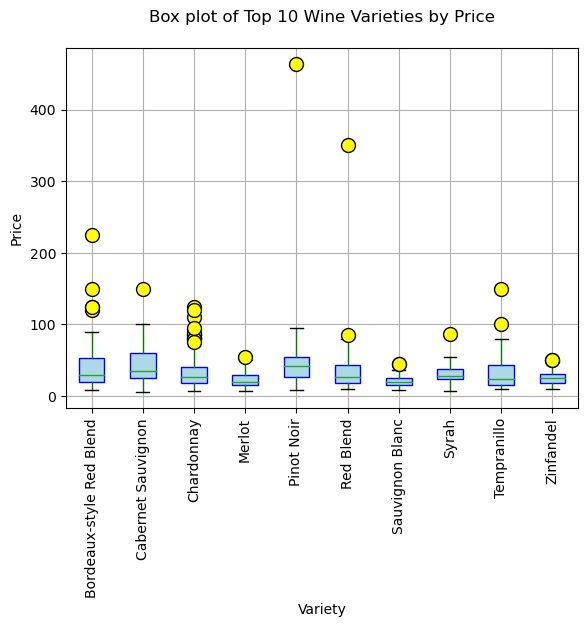

In [13]:
# Box and whisker plot of top wine varieties by price
box_whisker_plot(wine, 'price', 10)

Of the top 5 varieties, all have similar boxes. Significant number and value of outliers (yellow dots) at the higher end of the price range.